In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dgl
import pickle
import torch
from os import path
import dgl.function as fn

Using backend: pytorch


In [3]:
g, l = dgl.load_graphs('../data/sub_kowledge_graph.bin')
g

[Graph(num_nodes={'repo': 7054, 'user': 4417},
       num_edges={('repo', 'forked-by', 'user'): 222, ('repo', 'owned-by', 'user'): 581, ('repo', 'starred-by', 'user'): 8521, ('repo', 'watched-by', 'user'): 3371, ('user', 'fork', 'repo'): 222, ('user', 'own', 'repo'): 581, ('user', 'star', 'repo'): 8521, ('user', 'watch', 'repo'): 3371},
       metagraph=[('repo', 'user', 'forked-by'), ('repo', 'user', 'owned-by'), ('repo', 'user', 'starred-by'), ('repo', 'user', 'watched-by'), ('user', 'repo', 'fork'), ('user', 'repo', 'own'), ('user', 'repo', 'star'), ('user', 'repo', 'watch')]),
 Graph(num_nodes={'repo': 7054, 'user': 4417},
       num_edges={('repo', 'forked-by', 'user'): 74, ('repo', 'owned-by', 'user'): 194, ('repo', 'starred-by', 'user'): 2840, ('repo', 'watched-by', 'user'): 1124, ('user', 'fork', 'repo'): 74, ('user', 'own', 'repo'): 194, ('user', 'star', 'repo'): 2840, ('user', 'watch', 'repo'): 1124},
       metagraph=[('repo', 'user', 'forked-by'), ('repo', 'user', 'owned-by

In [3]:
train_graph = g[0]
valid_graph = g[1]
test_graph = g[2]

In [89]:
edges = train_graph.edges(etype=('user', 'star', 'repo'))
train_graph.edge_ids(edges[0], edges[1], etype=('user', 'star', 'repo'))

tensor([   0,    1,    2,  ..., 8518, 8519, 8520])

In [68]:
train_graph.number_of_nodes('repo')

5170

In [4]:
train_graph.ndata['statistic_data'] = {
    'repo': torch.ones(train_graph.number_of_nodes('repo')),
    'user': torch.ones(train_graph.number_of_nodes('user'))
}

In [5]:
valid_graph.ndata['statistic_data'] = {
    'repo': torch.ones(valid_graph.number_of_nodes('repo')),
    'user': torch.ones(valid_graph.number_of_nodes('user'))
}

In [6]:
test_graph.ndata['statistic_data'] = {
    'repo': torch.ones(test_graph.number_of_nodes('repo')),
    'user': torch.ones(test_graph.number_of_nodes('user'))
}

In [93]:
train_graph.ndata['statistic_data']

{'repo': tensor([1., 1., 1.,  ..., 1., 1., 1.]),
 'user': tensor([1., 1., 1.,  ..., 1., 1., 1.])}

In [7]:
train_graph.update_all(fn.copy_src('statistic_data', 'm'), fn.sum('m', 'user_repo'))

In [8]:
valid_graph.update_all(fn.copy_src('statistic_data', 'm'), fn.sum('m', 'user_repo'))

In [9]:
test_graph.update_all(fn.copy_src('statistic_data', 'm'), fn.sum('m', 'user_repo'))

In [97]:
valid_graph.ndata['user_repo']['repo'].shape

torch.Size([2408])

In [10]:
train_users_per_repo = train_graph.ndata['user_repo']['repo'].numpy()

In [11]:
valid_users_per_repo = valid_graph.ndata['user_repo']['repo'].numpy()

In [12]:
test_users_per_repo = test_graph.ndata['user_repo']['repo'].numpy()

In [101]:
train_graph.ndata['user_repo']['user'].numpy()

array([15., 35.,  3., ...,  1.,  1.,  1.], dtype=float32)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0688076d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f06880694c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f06880769d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0688069be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0688069f70>],
 'means': []}

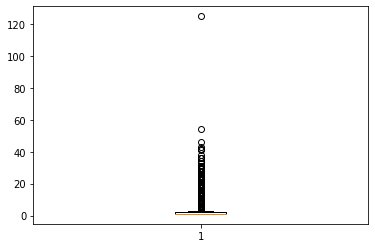

In [102]:
plt.boxplot(train_users_per_repo)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0687edb460>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0687edbbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0687edb220>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0687ec4310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0687ec46a0>],
 'means': []}

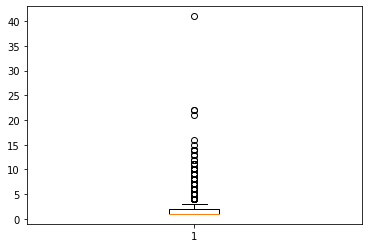

In [103]:
plt.boxplot(valid_users_per_repo)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0688111730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0688111e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f06881114c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f06880f95b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f06880f9940>],
 'means': []}

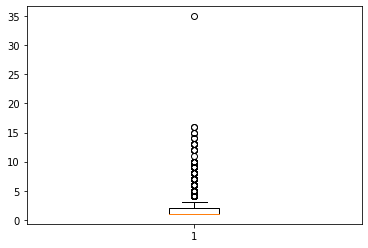

In [104]:
plt.boxplot(test_users_per_repo)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0687f4d5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0687f4dcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0687f4d340>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0687f3d430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0687f3d7c0>],
 'means': []}

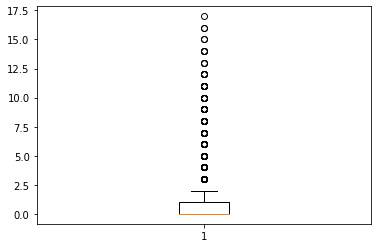

In [105]:
plt.boxplot(users_per_repo[users_per_repo<55])

In [55]:
# remove outliner
users_per_repo = users_per_repo[users_per_repo<20]

Text(0.5, 1.0, 'Distribution of users per repository -- train')

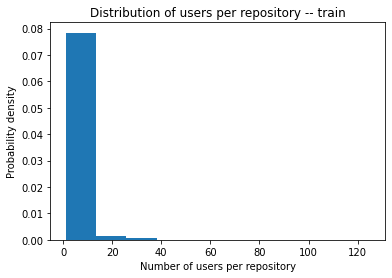

In [13]:
plt.hist(train_users_per_repo, density=True)
plt.xlabel('Number of users per repository')
plt.ylabel('Probability density')
plt.title('Distribution of users per repository -- train')

Text(0.5, 1.0, 'Distribution of users per repository -- valid')

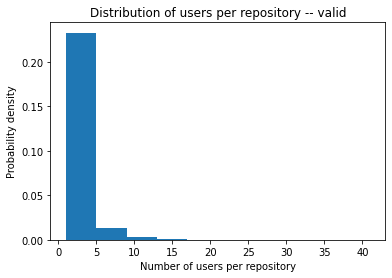

In [14]:
plt.hist(valid_users_per_repo, density=True)
plt.xlabel('Number of users per repository')
plt.ylabel('Probability density')
plt.title('Distribution of users per repository -- valid')

Text(0.5, 1.0, 'Distribution of users per repository -- test')

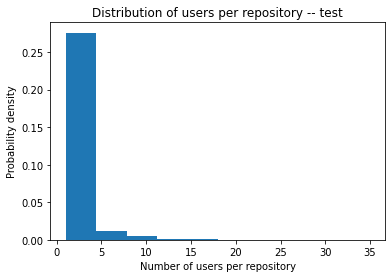

In [15]:
plt.hist(test_users_per_repo, density=True)
plt.xlabel('Number of users per repository')
plt.ylabel('Probability density')
plt.title('Distribution of users per repository -- test')

In [109]:
train_arg_sort = np.argsort(train_users_per_repo)[::-1]
sorted_train_users_per_repo = train_users_per_repo[train_arg_sort]

valid_arg_sort = np.argsort(valid_users_per_repo)[::-1]
sorted_valid_users_per_repo = valid_users_per_repo[valid_arg_sort]

test_arg_sort = np.argsort(test_users_per_repo)[::-1]
sorted_test_users_per_repo = test_users_per_repo[test_arg_sort]

Text(0.5, 1.0, 'Distribution of users per repository -- train')

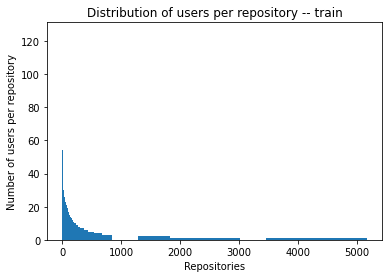

In [110]:
plt.bar(range(len(sorted_train_users_per_repo)), sorted_train_users_per_repo)
plt.xlabel('Repositories')
plt.ylabel('Number of users per repository')
plt.title('Distribution of users per repository -- train')

Text(0.5, 1.0, 'Distribution of users per repository -- valid')

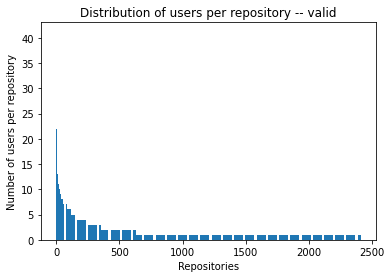

In [111]:
plt.bar(range(len(sorted_valid_users_per_repo)), sorted_valid_users_per_repo)
plt.xlabel('Repositories')
plt.ylabel('Number of users per repository')
plt.title('Distribution of users per repository -- valid')

Text(0.5, 1.0, 'Distribution of users per repository -- test')

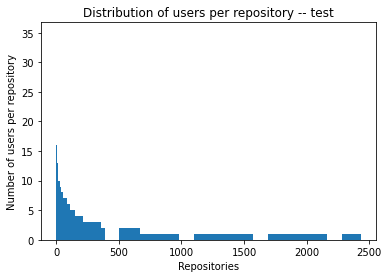

In [112]:
plt.bar(range(len(sorted_test_users_per_repo)), sorted_test_users_per_repo)
plt.xlabel('Repositories')
plt.ylabel('Number of users per repository')
plt.title('Distribution of users per repository -- test')